## Predictive Modelling of Customer satisfaction in The  Travel and Tourism Industry


### Methodology
- Understanding the Problem Statement
- Data Collection
- Data Validation/Data checks
- Data Cleaning
- Exploratory data analysis
- Conclusions


### 1) Problem Statement.
In the competative and experience_driven travel and tourism industry, understanding what drives customer satisfaction is critical for improving service quality, increasing customer retention and optimizing travel offerings. Travelers interact with multiple aspects of a trip - from transportation and hotel quality to the type and purpose of travel. Yet, customer satisfaction remains subjective and influenced by complex interconnected factors.

This project aims to develop a predictive model that can accurately forecast a traveler's satisfaction level based on key trip attributes such as destination, traveltype, transportation mode, hotel rating, trip duration and total cost. By leveraging machine learning techniques, the goal is to uncover patterns in the data that explain and predict satisfaction outcomes.

The insights derived from this model will empower travel service providers to:
- Anticipate customer needs.
- Improve travel planning and offerings.
- Enhance marketing personalization.
- Maximize customer satisfaction and loyalty.




### 2) Data Collection
Dataset Source - Kaggle
The data consists of 10 columns and 20000 rows with information on Passenger ID, travel destination, travel type, transportation mode, total cost, hotel rating and customer satisfaction


In [1]:
# Import the  required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as pandas dataframe

In [2]:
df=pd.read_csv(r"C:\Users\Bonareri\Passenger_Satisfaction_Prediction\notebook\data.csv")

#### 2.1) Show a sample of the dataset

In [3]:
df.sample(5)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction
13089,TRIP13226,USER7387,Rome,04-11-2024,10-02-2025,Leisure,Flight,5,2644.51,2.0
12760,TRIP12894,USER3068,Barcelona,24-06-2024,23-11-2024,Leisure,Flight,5,1421.58,1.0
6890,TRIP06955,USER9958,Sydney,15-01-2025,25-01-2025,Cultural,Car,3,1386.48,5.0
17543,TRIP17725,USER2231,Bangkok,06-01-2025,09-04-2025,Business,Cruise,1,3387.65,9.0
9589,TRIP09681,USER9899,New York,21-04-2024,14-12-2024,Beach,Bus,5,4647.50,2.0


#### 2.2) Shape of the dataset

In [4]:
df.shape


(20000, 10)

#### 2.3) Dataset Information
- Trip ID
- User ID
- Destination: Istanbul, New York, London, Bangkok, Paris, Dubai, Barcelona, Sydney, Rome, Tokyo
- Departure date 
- Return date
- Travel type: Cultural, Adventure, Leisure, Family, Business, Beach
- Transportation Mode: Car, Train, Flight, Bus, Cruise
- Hotel Rating: Scale of 1 - 5
- Total Cost
- Customer_Satisfaction: Scale of 1 - 10

In [5]:
df.nunique()

Trip ID                  20000
User ID                   8041
Destination                 10
Departure Date             366
Return Date                386
Travel Type                  6
Transportation Mode          5
Hotel Rating                 5
Total Cost ($)           19565
Customer_Satisfaction       10
dtype: int64

In [6]:
df["Customer_Satisfaction"].value_counts()

Customer_Satisfaction
10.0    2050
7.0     2022
1.0     1997
4.0     1988
3.0     1971
6.0     1971
5.0     1960
8.0     1953
2.0     1948
9.0     1940
Name: count, dtype: int64

### 3) Data Validation/Data checks to perform
- Check missing values
- Check duplicates
- Check data types
- Check statistics of the data set
- Check number of unique values for each column
- Check variuos categories present in categorical columns


#### 3.1) Check missing values

In [7]:
df.isna().sum()

Trip ID                    0
User ID                    0
Destination                0
Departure Date             0
Return Date                0
Travel Type                0
Transportation Mode        0
Hotel Rating               0
Total Cost ($)             0
Customer_Satisfaction    200
dtype: int64

There are 200 missing values in the Customer_Satisfaction column

#### 3.2) Check for duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

#### 3.3) Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip ID                20000 non-null  object 
 1   User ID                20000 non-null  object 
 2   Destination            20000 non-null  object 
 3   Departure Date         20000 non-null  object 
 4   Return Date            20000 non-null  object 
 5   Travel Type            20000 non-null  object 
 6   Transportation Mode    20000 non-null  object 
 7   Hotel Rating           20000 non-null  int64  
 8   Total Cost ($)         20000 non-null  float64
 9   Customer_Satisfaction  19800 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


The Departure date and Return date have been assigned Dtype:Object instead of datetime. We will have to correct that

#### 3.4) Check Statistics of numerical columns


In [10]:
df.describe()

,Hotel Rating,Total Cost ($),Customer_Satisfaction
count,20000.000000,20000.000000,19800.000000
mean,2.999250,2738.951921,5.511212
std,1.407817,1301.437636,2.879006
min,1.000000,500.040000,1.000000
25%,2.000000,1606.500000,3.000000
50%,3.000000,2729.325000,6.000000
75%,4.000000,3862.110000,8.000000
max,5.000000,4999.580000,10.000000


##### Insights
- On average hotel ratings are just below 3 which indicates that customer experience were slightly below neutral. this suggests that hotel quality may not have fully met customer expectations. The median aligns closely with the mean indicating a fairly symmetric distribution. A standard deviation of 1.4 on a 1-5 scale is quite high and this indicates that ratings are widely spread out meaning some travellers rated hotels very poorly while others gave very high ratings. This wide spread suggests varying experiences possibly due to difference in hotel quality, price range or traveller expectations.
- The total cost mean and median are very close, suggesting that the data is approximately symmetric. The standard deviation(1301) is quite high relative to the mean. It indicates significant variability in trip costs which is likely due to different destinations, hotel ratings, trip duration and transportation mode.
- The average Customer satisfaction  rating is slightly above the midpoint suggesting that overall satisfaction is neutral to slightly positive. The standard deviation is very high relative to the scale and it means satisfaction scores are widely spread out.

#### 3.4) Check number of unique values for each columns

In [11]:
df.nunique()

Trip ID                  20000
User ID                   8041
Destination                 10
Departure Date             366
Return Date                386
Travel Type                  6
Transportation Mode          5
Hotel Rating                 5
Total Cost ($)           19565
Customer_Satisfaction       10
dtype: int64

#### 3.5) Check various categories present in categorical columns

In [12]:
print("Categories in 'Destinaton' variable: ", df.Destination.unique())
print("Categories in 'Travel Type' variable: ", df['Travel Type'].unique())
print("Categories in 'Transportation Mode' variable: ", df['Transportation Mode'].unique())
print("Categories in 'Hotel Rating' variable: ", df['Hotel Rating'].unique())
print("Categories in 'Customer_Satisfaction' variable: ", df.Customer_Satisfaction.unique())

Categories in 'Destinaton' variable:  ['Sydney' 'Tokyo' 'New York' 'Bangkok' 'Paris' 'Dubai' 'Istanbul'
 'Barcelona' 'London' 'Rome']
Categories in 'Travel Type' variable:  ['Cultural' 'Leisure' 'Business' 'Adventure' 'Beach' 'Family']
Categories in 'Transportation Mode' variable:  ['Bus' 'Flight' 'Cruise' 'Train' 'Car']
Categories in 'Hotel Rating' variable:  [4 3 2 1 5]
Categories in 'Customer_Satisfaction' variable:  [ 1.  3.  7.  9. 10.  4.  2.  6.  5.  8. nan]


### 4) Data Cleaning

There is not much to clean in this dataset, only to convert the date columns and drop the rows with missing values which accounts for one percent of our data

#### 4.1) Converting date columns


In [13]:
df['Departure Date']=pd.to_datetime(df['Departure Date'])
df['Return Date']=pd.to_datetime(df['Return Date'])

#### 4.2) Dropping Null values

In [14]:
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19800 entries, 0 to 19799
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip ID                19800 non-null  object        
 1   User ID                19800 non-null  object        
 2   Destination            19800 non-null  object        
 3   Departure Date         19800 non-null  datetime64[ns]
 4   Return Date            19800 non-null  datetime64[ns]
 5   Travel Type            19800 non-null  object        
 6   Transportation Mode    19800 non-null  object        
 7   Hotel Rating           19800 non-null  int64         
 8   Total Cost ($)         19800 non-null  float64       
 9   Customer_Satisfaction  19800 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 1.7+ MB


In [16]:
clean_df=df.copy()

The dataframe is now clean and ready for analysis

#### 5) Exploratory Data Analysis

In [17]:
clean_df.sample(3)

,Trip ID,User ID,Destination,Departure Date,Return Date,Travel Type,Transportation Mode,Hotel Rating,Total Cost ($),Customer_Satisfaction
6292,TRIP06352,USER5634,Dubai,2025-01-09,2025-02-02,Adventure,Train,1,3417.82,5.0
4727,TRIP04772,USER7900,Barcelona,2024-10-22,2025-04-10,Beach,Train,4,928.54,3.0
11908,TRIP12026,USER8612,Bangkok,2024-12-27,2024-12-30,Cultural,Car,3,3855.72,10.0


#### 5.1) Customer satisfaction ratings

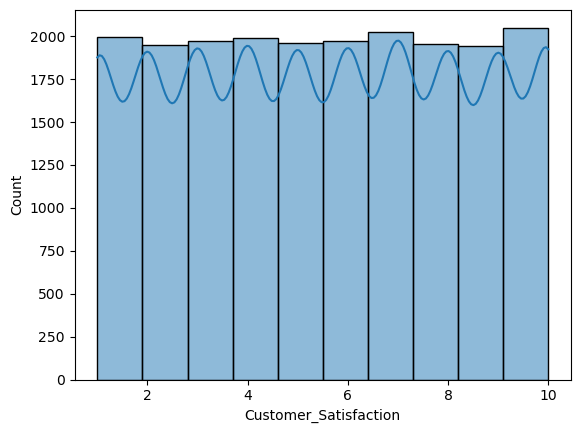

In [18]:
sns.histplot(clean_df['Customer_Satisfaction'], bins=10, kde=True)
plt.show()

In [19]:
def satisfaction_level(score):
    if score <= 4:
        return 'Low'
    elif score <=7:
        return "Medium"
    else:
        return 'High'
    
clean_df['Satisfaction_level']=clean_df["Customer_Satisfaction"].apply(satisfaction_level)

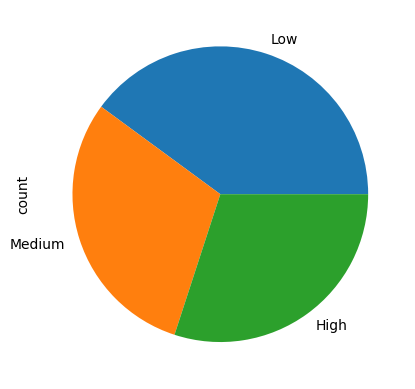

In [20]:
clean_df.Satisfaction_level.value_counts().plot(kind='pie')
plt.show()

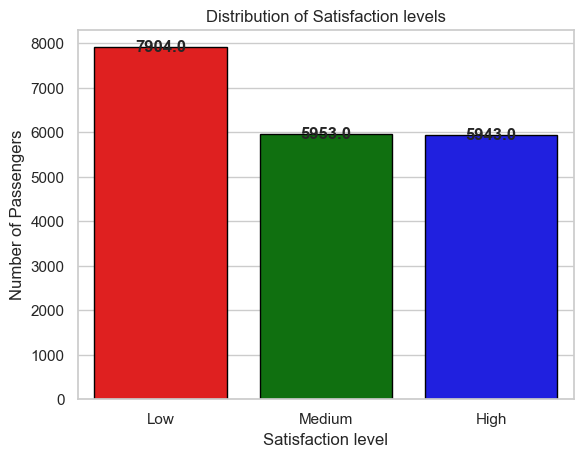

<Figure size 800x600 with 0 Axes>

In [21]:
sns.set(style="whitegrid")
colors=['red','green','blue']
ax=sns.countplot(x='Satisfaction_level', data=clean_df, palette=colors, edgecolor='black')
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',(p.get_x()+p.get_width()/2.,height+1), ha='center', va='center',fontsize=12,fontweight='bold')
plt.title('Distribution of Satisfaction levels')
plt.xlabel('Satisfaction level')
plt.ylabel('Number of Passengers')
plt.figure(figsize=(8,6))
plt.show()

#### Insights
- Low satisfaction has the highest number of travellers accounting to approximately 40 percent.
- The number of travellers in Medium and High are almost the same. This suggests that those who aren't extremely satisfied are almost evenly split between neutral and happy. 
- The combined medium plus high satisfaction is approximately 60 percent which means majority aren't completely unhappy. However, the 40 percent low satisfaction is alarmingly high and signals a concerning trend.

Travel Type vs Satisfaction

In [22]:
Travel_satisfaction=pd.crosstab(clean_df['Travel Type'], clean_df['Satisfaction_level'], normalize='index')*100

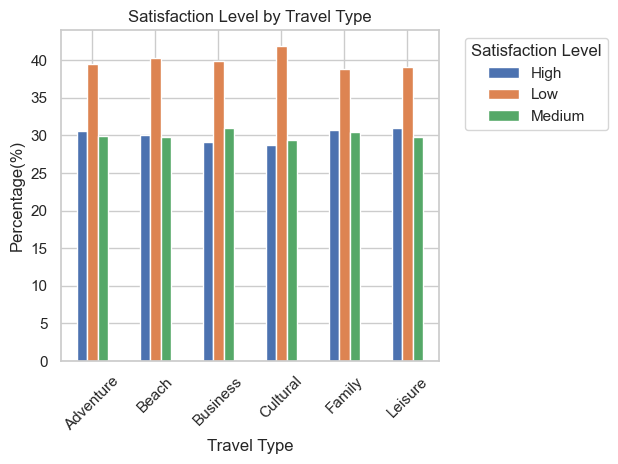

In [23]:
Travel_satisfaction.plot(kind='bar')
plt.title('Satisfaction Level by Travel Type')
plt.ylabel('Percentage(%)')
plt.xlabel('Travel Type')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()


plt.show()

#### Insights
- Satisfaction is fairly consistent across travel types. All travel types show similar proportions of High, Medium, and Low satisfaction. No category significantly outperforms or underperforms in terms of satisfaction.
- Low satisfaction is the most common across all travel types. Each bar's middle section (Low) is the tallest.This suggests that most travelers are not fully satisfied, regardless of purpose.
- High satisfaction hovers around 30% in all categories. This shows limited delight among customers, possibly due to service gaps across the industry.
- Leisure and Family travel show slightly better satisfaction. These have marginally taller High segments and smaller Low segments than Business or Cultural.

#### Transportation mode vs Satisfaction

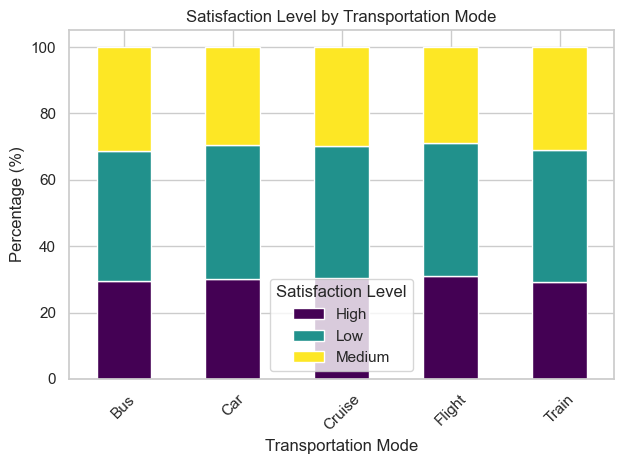

In [24]:
transportation_mode_vs_sl=pd.crosstab(clean_df['Transportation Mode'], clean_df['Satisfaction_level'], normalize='index') * 100
transportation_mode_vs_sl.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Satisfaction Level by Transportation Mode')
plt.ylabel('Percentage (%)')
plt.xlabel('Transportation Mode')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Insights
- Proportions are closely similar across all modes, but we can still spot subtle differences.Flight and Car show a slightly higher proportion of "High" satisfaction (just above 30%) compared to other modes.This suggests that customers who travel by flight or car are marginally more satisfied.
- Cruise and Train have a slightly higher percentage of "Low" satisfaction compared to other modes.May indicate that services or experiences via cruise/train need improvement.
- Medium satisfaction remains fairly stable across all modes hovering around 30% to 33%, suggesting a consistent number of neutral experiences regardless of mode.
- While differences are not huge, Flight and Car could be the most preferred transport modes in terms of customer experience.
- Train and Cruise operators may need to review factors affecting customer experience to reduce dissatisfaction.
- Overall, transportation choice doesn't drastically change satisfaction, but small optimizations could shift more users from Low/Medium to High



#### Destination Vs Satisfaction level

In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19800 entries, 0 to 19799
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip ID                19800 non-null  object        
 1   User ID                19800 non-null  object        
 2   Destination            19800 non-null  object        
 3   Departure Date         19800 non-null  datetime64[ns]
 4   Return Date            19800 non-null  datetime64[ns]
 5   Travel Type            19800 non-null  object        
 6   Transportation Mode    19800 non-null  object        
 7   Hotel Rating           19800 non-null  int64         
 8   Total Cost ($)         19800 non-null  float64       
 9   Customer_Satisfaction  19800 non-null  float64       
 10  Satisfaction_level     19800 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 1.8+ MB


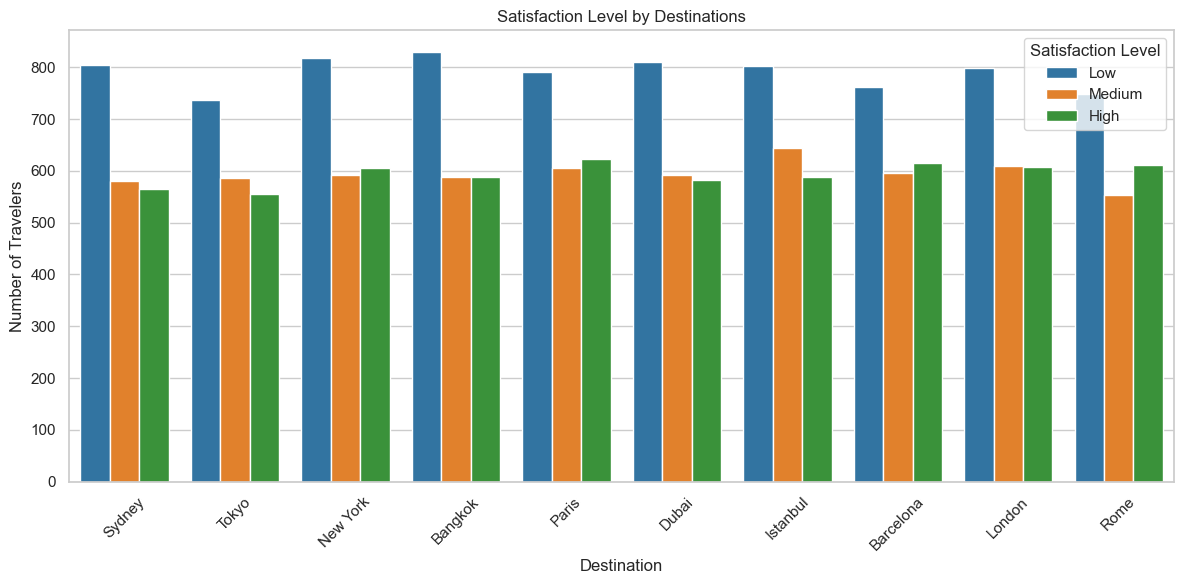

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=clean_df, x='Destination', hue='Satisfaction_level', palette='tab10')
plt.title('Satisfaction Level by Destinations')
plt.xlabel('Destination')
plt.ylabel('Number of Travelers')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()


#### Insights
- Low Satisfaction Dominates Across All Destinations. All cities have the highest count in the 'Low' satisfaction category. This could signal a global issue with traveler expectations not being met, regardless of destination.
- Top Performers in High Satisfaction: Paris, Barcelona, and Rome have relatively higher 'High' satisfaction levels, nearly matching their 'Medium' categories. This implies better traveler experiences in these cities compared to others.
- Underperforming Destinations (Lower High Satisfaction): Sydney, Tokyo, and Istanbul have noticeably fewer people highly satisfied. Sydney in particular stands out with a large "Low" bar and smaller "High".
- Balanced Cities (Close Values Across Categories): New York, Bangkok, Dubai and London show a more even distribution across all three satisfaction levels, indicating mixed but stable travel experiences.
- Istanbul's Medium Satisfaction is Notably High. Compared to others, Istanbul has one of the highest 'Medium' satisfaction levels.



#### HOtel rating vs satisfaction level

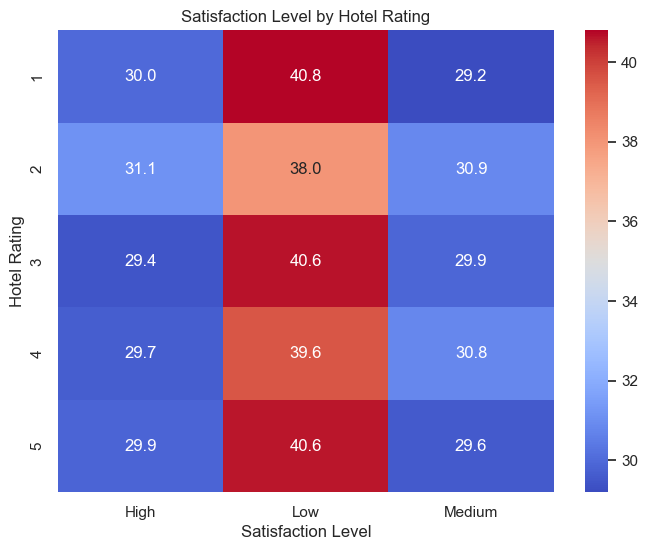

In [27]:
plt.figure(figsize=(8, 6))
hotel_rating_vs_sl=pd.crosstab(clean_df['Hotel Rating'], clean_df['Satisfaction_level'], normalize='index') * 100
sns.heatmap(hotel_rating_vs_sl, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Satisfaction Level by Hotel Rating')
plt.ylabel('Hotel Rating')
plt.xlabel('Satisfaction Level')
plt.show()


#### Total cost vs satisfaction level

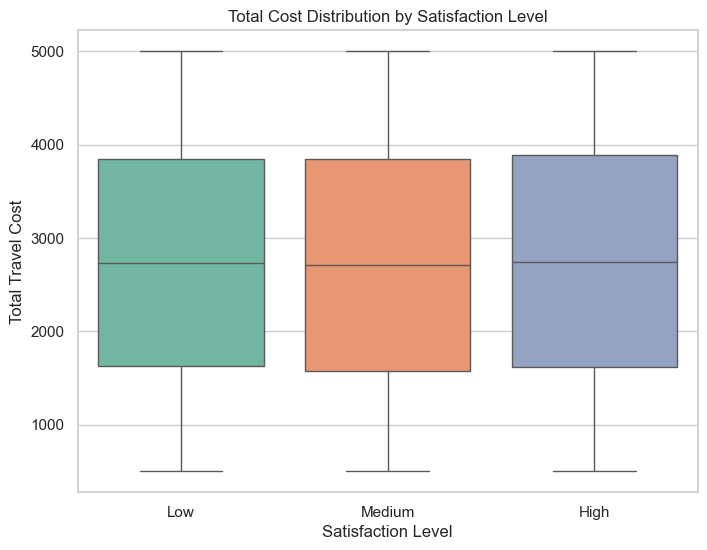

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfaction_level', y='Total Cost ($)', data=clean_df, palette='Set2')
plt.title('Total Cost Distribution by Satisfaction Level')
plt.ylabel('Total Travel Cost')
plt.xlabel('Satisfaction Level')
plt.show()


#### Departure month vs satisfaction level

<Figure size 1200x600 with 0 Axes>

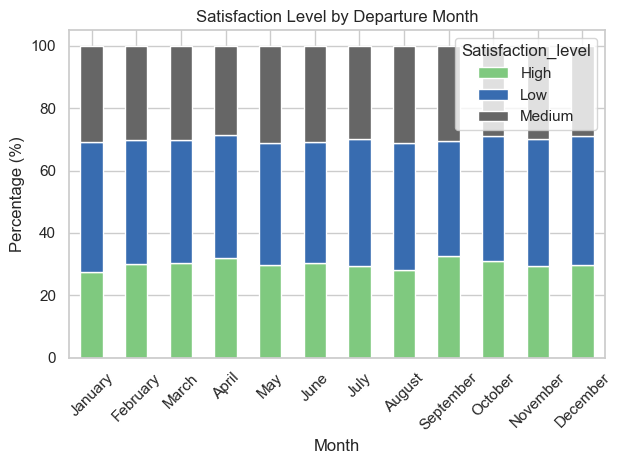

In [29]:
clean_df['Departure Month'] =clean_df['Departure Date'].dt.month_name()

plt.figure(figsize=(12, 6))
month_vs_sl = pd.crosstab(clean_df['Departure Month'], clean_df['Satisfaction_level'], normalize='index') * 100
month_vs_sl = month_vs_sl.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
month_vs_sl.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Satisfaction Level by Departure Month')
plt.ylabel('Percentage (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
clean_df['Trip_Duration']=(clean_df['Return Date']- clean_df['Departure Date']).dt.days
clean_df.Trip_Duration.sample(5)

11796    194
662       15
5706      76
13490     32
15519     29
Name: Trip_Duration, dtype: int64

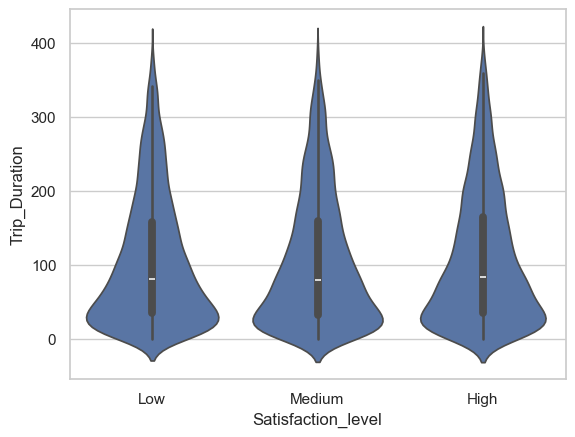

In [31]:
sns.violinplot(data=clean_df, x='Satisfaction_level', y='Trip_Duration')
plt.show()

In [35]:
path=r"C:\Users\Bonareri\Passenger_Satisfaction_Prediction\notebook\clean_data.csv"
clean_df.to_csv(path, index=False,encoding='utf-8')

In [ ]:
clean_df.info()